# Project:2 Income Qualification ML

In [1]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\JITENDRA\Machine Learning\project\Project 2 - Income Qualification\Dataset for the project\Dataset for the project"


C:\JITENDRA\Machine Learning\project\Project 2 - Income Qualification\Dataset for the project\Dataset for the project


In [3]:
#importing datasets
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)

In [4]:
#top5 rows of df_train data
df_train.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
print(df_train.shape)

(9557, 143)


In [6]:
#top5 rows of df_test data
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [7]:
df_test.shape

(23856, 142)

## Identify output Variable

In [8]:
for i in df_train.columns:
    if i not in df_test.columns:
        print("Our Output variable is",i)

Our Output variable is Target


## Understand the type of data.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [11]:
df_train.dtypes.value_counts()

# in train data set there are 130 int64 ,float64 8 and Object type are 5 

int64      130
float64      8
object       5
dtype: int64

## Here i'm driving data according to data types for easy of understanding.

In [12]:
intcols=df_train.select_dtypes('int64')

In [13]:
intcols.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,12,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,1,1,0,1,1,1,1,11,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,9,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,1,0,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,4,4,11,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,4,0,0,0,0,1,0,0,0,0,3,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1369,4


In [14]:
floatcol=df_train.select_dtypes('float64')

In [15]:
floatcol.head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [16]:
objectcol=df_train.select_dtypes('object')



In [17]:
objectcol.head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


## Check if there are any biases in your dataset.

C:\Users\ejitvya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

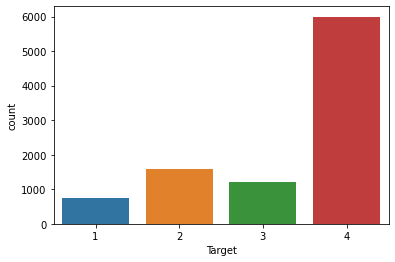

In [18]:
sns.countplot(df_train["Target"])

## As we seen above 1-extreeme poverty is smallest count in train data set.the data set is biased.

## Count how many null values are existing in columns

In [19]:
pd.pandas.set_option('display.max_rows',None)

In [20]:
df_train.isnull().sum().sort_values(ascending=False)
#5 columns are there which have null values

rez_esc            7928
v18q1              7342
v2a1               6860
SQBmeaned             5
meaneduc              5
Id                    0
hogar_adul            0
parentesco10          0
parentesco11          0
parentesco12          0
idhogar               0
hogar_nin             0
dependency            0
hogar_mayor           0
hogar_total           0
edjefe                0
edjefa                0
instlevel1            0
instlevel2            0
parentesco9           0
parentesco7           0
parentesco8           0
estadocivil6          0
female                0
estadocivil1          0
estadocivil2          0
estadocivil3          0
estadocivil4          0
estadocivil5          0
estadocivil7          0
instlevel4            0
parentesco1           0
parentesco2           0
parentesco3           0
parentesco4           0
parentesco5           0
parentesco6           0
instlevel3            0
instlevel6            0
instlevel5            0
SQBescolari           0
lugar4          

In [21]:
df_train["rez_esc"].value_counts(dropna=False)

NaN    7928
0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [22]:
df_train["rez_esc"].describe()

count    1629.000000
mean        0.459791
std         0.946550
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: rez_esc, dtype: float64

In [23]:
df_train["rez_esc"]=df_train["rez_esc"].fillna(df_train["rez_esc"].median())
df_test["rez_esc"]=df_test["rez_esc"].fillna(df_test["rez_esc"].median())

In [24]:
df_train["v18q1"].value_counts(dropna=False)

NaN    7342
1.0    1586
2.0     444
3.0     129
4.0      37
5.0      13
6.0       6
Name: v18q1, dtype: int64

In [25]:
df_train["v18q1"].describe()

count    2215.000000
mean        1.404063
std         0.763131
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: v18q1, dtype: float64

In [26]:
df_train["v18q"].value_counts()
#7342 house do not owns tablet

0    7342
1    2215
Name: v18q, dtype: int64

In [27]:
#we fillna in v18q1 with 0
df_train["v18q1"]=df_train["rez_esc"].fillna(0.0)
df_test["v18q1"]=df_test["rez_esc"].fillna(0.0)

In [28]:
df_train["v2a1"].describe()

count    2.697000e+03
mean     1.652316e+05
std      1.504571e+05
min      0.000000e+00
25%      8.000000e+04
50%      1.300000e+05
75%      2.000000e+05
max      2.353477e+06
Name: v2a1, dtype: float64

In [29]:
df_train["v2a1"].value_counts()

150000.0     233
100000.0     181
200000.0     159
120000.0     149
50000.0      118
80000.0      104
90000.0       81
70000.0       79
180000.0      77
300000.0      76
250000.0      75
40000.0       72
60000.0       57
350000.0      53
130000.0      53
110000.0      53
30000.0       48
160000.0      46
170000.0      41
140000.0      39
220000.0      30
0.0           29
45000.0       25
570540.0      25
175000.0      23
400000.0      22
20000.0       22
285270.0      21
25000.0       21
125000.0      20
35000.0       20
185000.0      20
500000.0      19
65000.0       19
456432.0      19
85000.0       16
135000.0      15
27000.0       14
75000.0       14
55000.0       13
270000.0      12
855810.0      11
240000.0      11
230000.0      11
600000.0      11
132000.0      10
260000.0      10
145000.0      10
32000.0       10
342324.0       9
450000.0       9
225000.0       8
72000.0        8
115000.0       8
550000.0       8
171162.0       7
1000000.0      7
94000.0        7
84529.0       

In [30]:
df_train["v2a1"]=df_train["v2a1"].fillna(0.0)
df_test["v2a1"]=df_test["v2a1"].fillna(0.0)

In [31]:
df_train["SQBmeaned"].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

In [32]:
df_train["SQBmeaned"]=df_train["SQBmeaned"].fillna(df_train["SQBmeaned"].mean())
df_test["SQBmeaned"]=df_test["SQBmeaned"].fillna(df_test["SQBmeaned"].mean())

df_train["meaneduc"].describe()

In [33]:
df_train["meaneduc"]=df_train["meaneduc"].fillna(df_train["meaneduc"].mean())
df_test["meaneduc"]=df_test["meaneduc"].fillna(df_test["meaneduc"].mean())

In [34]:
df_train.isnull().sum().sort_values(ascending=False)

Id                 0
hogar_mayor        0
parentesco10       0
parentesco11       0
parentesco12       0
idhogar            0
hogar_nin          0
hogar_adul         0
hogar_total        0
parentesco8        0
dependency         0
edjefe             0
edjefa             0
meaneduc           0
instlevel1         0
instlevel2         0
parentesco9        0
parentesco7        0
instlevel4         0
estadocivil5       0
male               0
female             0
estadocivil1       0
estadocivil2       0
estadocivil3       0
estadocivil4       0
estadocivil6       0
parentesco6        0
estadocivil7       0
parentesco1        0
parentesco2        0
parentesco3        0
parentesco4        0
parentesco5        0
instlevel3         0
instlevel5         0
eviv3              0
SQBage             0
lugar5             0
lugar6             0
area1              0
area2              0
age                0
SQBescolari        0
SQBhogar_total     0
lugar3             0
SQBedjefe          0
SQBhogar_nin 

## Check whether all members of the house have the same poverty level

In [35]:
pd.crosstab(df_train["r4t3"],df_train["Target"])

Target,1,2,3,4
r4t3,,,,
1,20,47,54,257
2,99,176,122,958
3,166,303,232,1559
4,165,363,315,1604
5,130,344,236,888
6,67,212,131,414
7,49,69,75,175
8,8,32,16,40
9,18,36,9,27


In [36]:
poverty_variance_within_household = df_train.groupby('idhogar')['Target'].nunique()
print(sum(poverty_variance_within_household>1))

85


In [37]:
df_train[df_train['idhogar'] == poverty_variance_within_household[
    list(poverty_variance_within_household>1)].index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


## from above it concluded that all the members of family has different poverty level and from below graph it shown clearly

C:\Users\ejitvya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r4t3', ylabel='Target'>

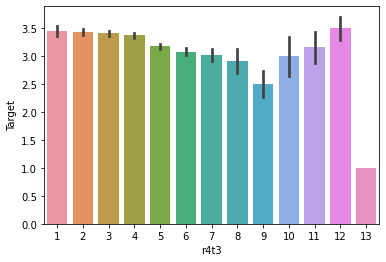

In [38]:
sns.barplot(df_train['r4t3'],df_train['Target'])

## Check if there is a house without a family head.

In [39]:
df_train.parentesco1.value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [40]:
pd.crosstab(df_train['edjefa'],df_train['edjefe'])

edjefe,10,11,12,13,14,15,16,17,18,19,2,20,21,3,4,5,6,7,8,9,no,yes
edjefa,,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,399,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


## 435 family are there without house head

#mixed data treatment


In [41]:
df_train["edjefe"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)
df_train["edjefa"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)
df_train["dependency"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)

df_test["edjefe"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)
df_test["edjefa"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)
df_test["dependency"].replace(to_replace =["no","yes"],
                 value =[0,1],inplace=True)



In [42]:
df_train["edjefa"].value_counts()

0     6230
6      947
11     399
9      237
8      217
15     188
7      179
5      176
3      152
4      136
14     120
16     113
10      96
2       84
17      76
12      72
1       69
13      52
21       5
19       4
18       3
20       2
Name: edjefa, dtype: int64

In [43]:
#changing datatype object to int and float
df_train["edjefa"]=df_train["edjefa"].astype("int64")
df_train["edjefe"]=df_train["edjefe"].astype("int64")
df_train["dependency"]=df_train["dependency"].astype("float")
df_test["edjefa"]=df_test["edjefa"].astype("int64")
df_test["edjefe"]=df_test["edjefe"].astype("int64")
df_test["dependency"]=df_test["dependency"].astype("float")

## Set poverty level of the members and the head of the house within a family.

In [44]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,0.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,0.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.0,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [45]:
Poverty_level=df_train[df_train['v2a1'] !=0]

In [46]:
Poverty_level.shape

#there are 2668 familys who pays the rent rest all have there own house so those families are not come in below poority level

(2668, 143)

In [47]:
poverty_level=Poverty_level.groupby('area1')['v2a1'].apply(np.median)

In [48]:
poverty_level

area1
0     80000.0
1    140000.0
Name: v2a1, dtype: float64

In [49]:
#For rural area level if people paying rent less than 8000 is under poverty level.
#For Urban area level if people paying rent less than 140000 is under poverty level.

In [50]:
def poverty(x):
    if x<8000:
        return('Below poverty level')
    
    elif x>140000:
        return('Above poverty level')
    elif x<140000:
        return('Below poverty level: Ur-ban ; Above poverty level : Rural ')
   

In [51]:
c=Poverty_level['v2a1'].apply(poverty)

In [52]:
c.shape

(2668,)

In [53]:
pd.crosstab(c,Poverty_level['area1'])

area1,0,1
v2a1,,
Above poverty level,139,1103
Below poverty level: Ur-ban ; Above poverty level : Rural,306,1081


In [54]:
#Interpretation :

#There are total 1242 people above poverty level independent of area whether rural or Urban
#Remaining 1111 people level depends on their area
#Rural :

#Above poverty level= 445

#Urban :

#Above poverty level =1103

#Below poverty level=1081

In [55]:
#droping id columns from test and train
df_train=df_train.drop(["Id","idhogar"],axis=1)
df_test=df_test.drop(["Id","idhogar"],axis=1)


In [56]:
df_train.shape

(9557, 141)

In [57]:
df_test.shape

(23856, 140)

In [61]:
X=df_train.drop(["Target"],axis=1)
Y=df_train["Target"]
                

In [62]:
## Lets Perform Modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42)
rfc = RandomForestClassifier()

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7645, 140)
(1912, 140)
(7645,)
(1912,)


In [77]:
from sklearn.model_selection import GridSearchCV
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [82]:
parameters=[{"n_estimators":[30,40,100],"max_depth":[10,15,20],"class_weight":["balanced", "balanced_subsample"],
            }]

In [83]:
clf = GridSearchCV(rfc,parameters, cv = 10, scoring='accuracy')

In [84]:
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'max_depth': [10, 15, 20],
                          'n_estimators': [30, 40, 100]}],
             scoring='accuracy')

In [81]:
print(clf.best_params_)
print(clf.best_score_)

{'class_weight': 'balanced_subsample', 'max_depth': 20, 'n_estimators': 40}
0.9084371898846797


In [85]:
rfc=RandomForestClassifier(n_estimators=40,class_weight="balanced_subsample",max_depth=20)

In [86]:
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=40)

In [87]:
pred=rfc.predict(x_test)

In [88]:
pred

array([2, 1, 1, ..., 4, 4, 4], dtype=int64)

In [89]:
rfc.score(x_train,y_train) #99% accuracy on training data

0.9998691955526487

In [90]:
accuracy_score(y_test,pred)#giving 92% accuracy score on test data

0.9267782426778243

In [92]:
confusion_matrix(y_test,y_pred)

array([[ 135,   11,    0,   18],
       [   6,  268,    6,   31],
       [   2,    8,  199,   45],
       [   0,    3,    4, 1176]], dtype=int64)

In [93]:
print("\nclassification_report:\n",classification_report(y_test,y_pred))


classification_report:
               precision    recall  f1-score   support

           1       0.94      0.82      0.88       164
           2       0.92      0.86      0.89       311
           3       0.95      0.78      0.86       254
           4       0.93      0.99      0.96      1183

    accuracy                           0.93      1912
   macro avg       0.94      0.87      0.90      1912
weighted avg       0.93      0.93      0.93      1912



In [95]:
f1_score(y_test,y_pred,average='weighted')

0.9279452119364499

In [96]:
#lets predict on test data

In [97]:
y_predict_testdata = rfc.predict(df_test)
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

## Check the accuracy using random forest with cross validation.

In [107]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(rfc, x_train,y_train, cv=cv, n_jobs=-1)

In [108]:

np.mean(scores) #cross validation score

0.911140768116438

## Important features

In [113]:
labels = list(x_train)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rfc.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()


,feature,importance
0,v2a1,0.017928
2,rooms,0.020638
9,r4h2,0.017117
10,r4h3,0.016131
13,r4m3,0.016103


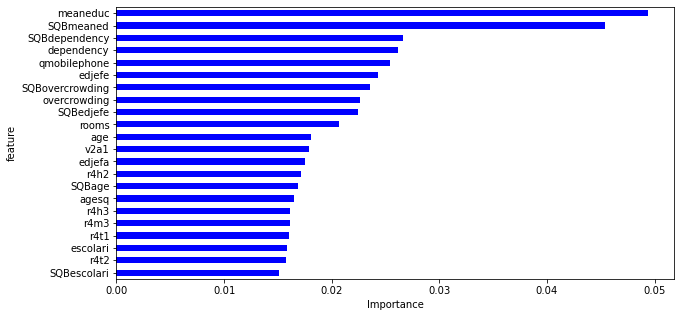

In [111]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(10, 5),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');